# Iteracja punktów środkowych

W tym przykładzie zbadamy co się dzieje z wielokątami, które powstają przez połączenie punktów środkowych kolejnych krawędzi.

Iterując odwzorowanie jesteśmy w stanie zaobserwować pewne ''zaokrąglanie się'' wyjściowego kształtu. Dlaczego tak się dzieje?

In [12]:
def AvPt(x,y):
    xv=vector(x)
    yv=vector(y)
    vv=(xv+yv)*(1/2);
    return (vv[0],vv[1])

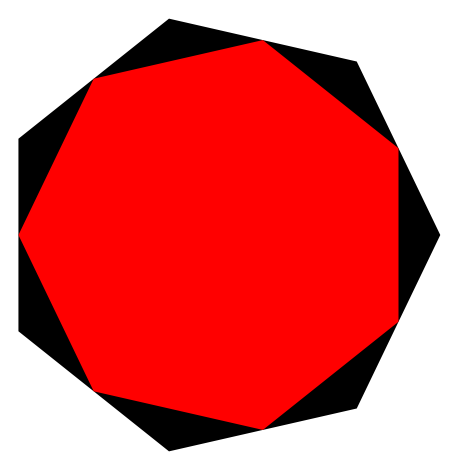

In [13]:
r7=[exp(2*pi*I*k/7) for k in [0..6]]
polylist=[(x.real_part(),x.imag_part()) for x in r7]

polyiter=[AvPt(polylist[i],polylist[(i+1)% 7]) for i in [0..6]]
show(polygon(polylist,color='black')+polygon(polyiter,color='red'),axes=False)

In [14]:
#ta procedure generuje nowe punkty środkowe wielokąta z poprzednich
def AvPoly(polylist):
    n=len(polylist)
    return [AvPt(polylist[i],polylist[(i+1)% n]) for i in [0..(n-1)]]


## Zaokrąglanie


Zaokrąglanie (i uwypuklanie się) losowej figury startowej

In [15]:
#losowa wartość parametru na przedziale [-1,1]
def ra():
    return 2*random()-1

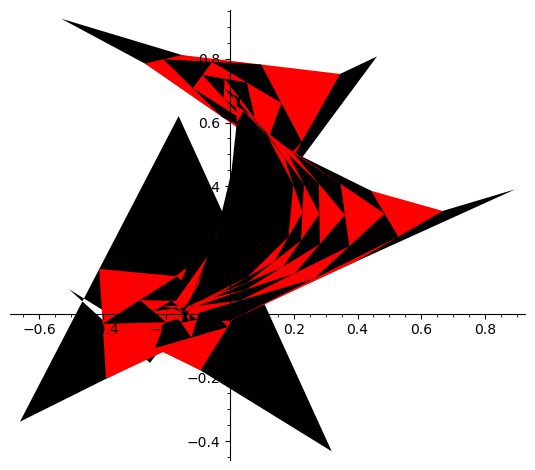

In [20]:
#rysowanie procesu uśredniającego dla losowego kształtu
polyiter=[(ra(),ra()) for i in [1..12]]
gra=polygon(polyiter,color="black")
for i in [1..10]:
    polyiter=AvPoly(polyiter)
    if i%2==0:
        gra=gra+polygon(polyiter,color="black")
    else:
        gra=gra+polygon(polyiter,color="red")
        

gra

In [21]:
#Regulujemy skalę, aby kształt nie zmniejszał się. To jeszcze bardziej uwidacznia ''zaokgrąglanie się'' iterowanego kształtu.
def AvPtScale(x,y,s):
    xv=vector(x)
    yv=vector(y)
    vv=(xv+yv)*(s/2);
    return (vv[0],vv[1])
def AvPolyScale(polylist,scale):
    n=len(polylist)
    return [AvPtScale(polylist[i],polylist[(i+1)% n],scale) for i in [0..(n-1)]]

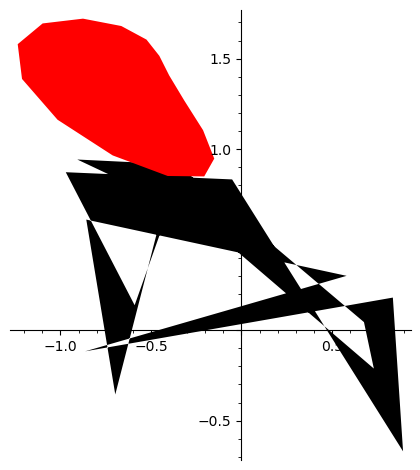

In [22]:
polyiter=[(ra(),ra()) for i in [1..15]]
gra0=polygon(polyiter,color="black")
for i in [1..30]:
    polyiter=AvPolyScale(polyiter,2^(1/15))
gra=polygon(polyiter,color="red")
gra0+gra

## Zachowania graniczne

Wyjaśnij dlaczego iterowany kształt staje się coraz bardziej okrągły? (Wskazówka: pomyśl o operatorze uśredniającym jako operatorze liniowym na punktach. Jakie są jego wartości własne?)

In [23]:
#trzy wierzchołki
#[z1,z2,z3]---->[(z1+z2)/2,(z2+z3)/2,(z3+z1)/2]


m=matrix([[1/2,1/2,0],[0,1/2,1/2],[1/2,0,1/2]])

#norma wartości własnych leży w przedziale [0,1]

x=var('x')
2^3*m.charpoly().subs(x=x/2+1/2).expand() #czy zawsze otrzymujemy wielomian postaci x^n-1?

x^3 - 1

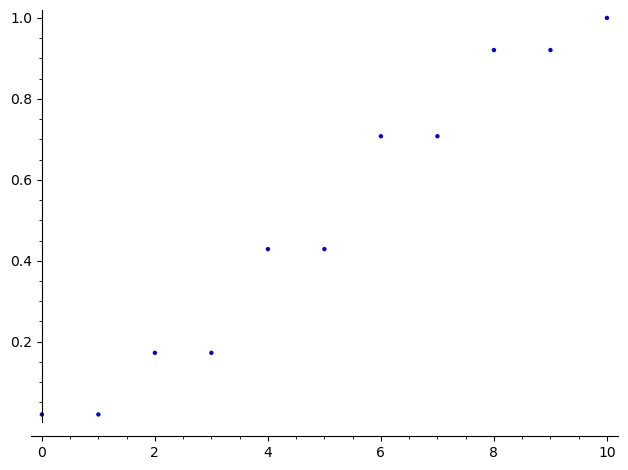

In [24]:
def Cycle(li1):
    return [li1[len(li1)-1]]+li1[0:len(li1)-1]


def CyclicMatrix(li):
    n=len(li)
    longlist=li
    for i in [2..n]:
        li=Cycle(li)
        longlist=longlist+li
    return matrix(QQ,n,longlist)

def Mat1(n):
    return CyclicMatrix([1/2,1/2]+[0 for i in [2..(n-1)]])

x=var('x')
(Mat1(6).characteristic_polynomial()).subs(x=x/2+1/2).expand()

#lista wartości własnych
liroo=[x[0].norm() for x in (Mat1(11).characteristic_polynomial()).roots(CC)]
liroo.sort()
list_plot(liroo) #norma wartości własnych należy do przedziału [0,1]

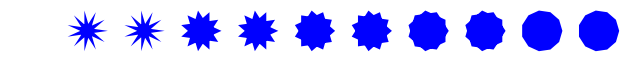

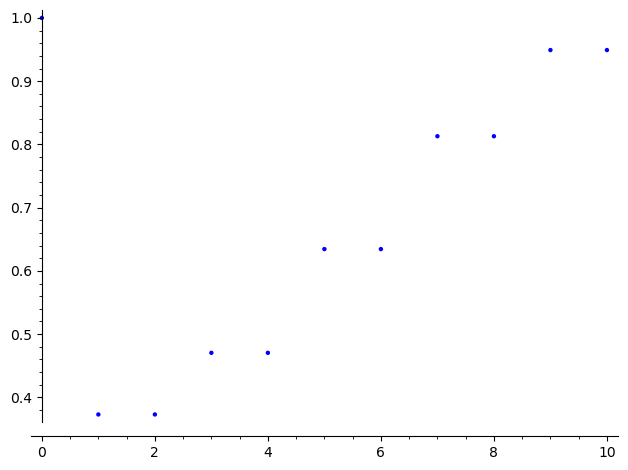

In [26]:
def Mat2(n,p):
    return CyclicMatrix([p,1-p]+[0 for i in [2..(n-1)]])

n=11
mn=Mat2(n,1/5)
v1=mn.eigenvectors_right()
graphics_array(list((polygon([CC(v1[j][1][0][k]) for k in [0..(n-1)]],axes=False) for j in [0..(n-1)]))).show()
list_plot(list(map(norm,mn.eigenvalues()))).show()

In [27]:
print([x.norm() for x in Mat2(5,1/10).eigenvalues()])
print([x.norm() for x in Mat2(5,1/2).eigenvalues()])

[1, 0.6743769410125095?, 0.6743769410125095?, 0.8756230589874905?, 0.8756230589874905?]
[1, 0.09549150281252628?, 0.09549150281252628?, 0.6545084971874737?, 0.6545084971874737?]


Wektory własne z maksymalną normą (równą 1) odpowiadają dwóm równobocznym n-kątom (udowodnij!). Każdy z tych n-kątów ma jedną z dwóch dostępnych orientacji wierzchołków (zgodnie i przeciwnie do ruchu wskazówek zegara). Wektory własne o normie ścisle mniejszej od 1 odpowiadają pewnym zbiorom gwiaździstym (również po dwie orientacje).

In [97]:
[mn.eigenvectors_right()[i][0].norm() for i in [0..10]]

[1,
 0.02025351319275131?,
 0.02025351319275131?,
 0.1725696330273575?,
 0.1725696330273575?,
 0.4288425808633575?,
 0.4288425808633575?,
 0.7077075065009432?,
 0.7077075065009432?,
 0.920626766415591?,
 0.920626766415591?]

The unique eigenvector with eigenvalue 1 corresponds to a fixed point.

In [30]:
#Experiment on iterations
m=Mat1(10)
v=vector((1,1+I,2+I,I,-1-I,-I,-I+1,-I+2,-I+3,-I+4))

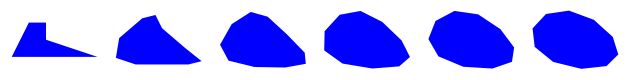

In [31]:
graphics_array(list((polygon([CC(x) for x in nest(lambda x: m*x,3*k,v)*1.0],axes=False,figsize=30) for k in [0..5])))

Dla wielokątów równobocznych proces uśredniania tylko obraca figurę (i ją kurczy).

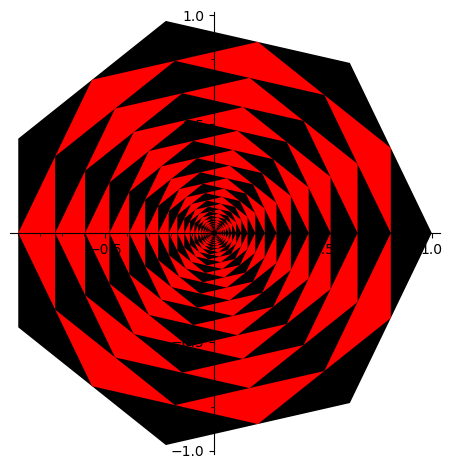

In [32]:
r7=[exp(2*pi*I*k/7) for k in [0..6]]
polyiter=[(x.real_part(),x.imag_part()) for x in r7]
gra=polygon(polyiter,color="black")
for i in [1..40]:
    polyiter=AvPoly(polyiter)
    if i%2==0:
        gra=gra+polygon(polyiter,color="black")
    else:
        gra=gra+polygon(polyiter,color="red")
        

gra

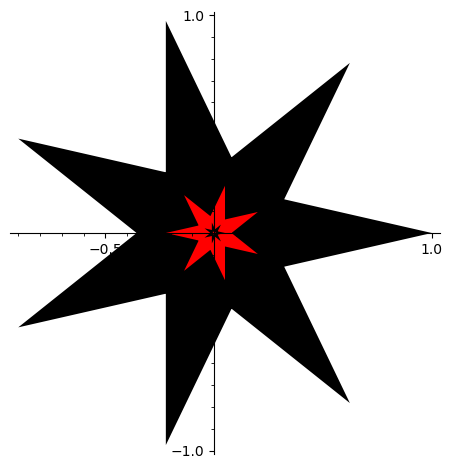

In [33]:
#Czyste kształty (odp. wektorom własnym dla wartości własnej moduły mniejszego od 1) nie stają się bardziej ''okrągłe''.
r7=[exp(2*pi*I*(4*k)/7) for k in [0..6]]
polyiter=[(x.real_part(),x.imag_part()) for x in r7]
gra=polygon(polyiter,color="black")
for i in [1..40]:
    polyiter=AvPoly(polyiter)
    if i%2==0:
        gra=gra+polygon(polyiter,color="black")
    else:
        gra=gra+polygon(polyiter,color="red")
        

gra

In [35]:
#W tej funkcji przesuwamy środek figury do początku układu współrzędnych, aby zredukować efekt płynięcia kształtu.
def ShiftCenter(li,tup):
    x,y=tup
    return [(m[0]+x,m[1]+y) for m in li]
polyiter=[(ra(),ra()) for i in [1..25]]
polyiter=ShiftCenter(polyiter,-sum([vector(x) for x in polyiter])*1/len(polyiter))
li=[polygon(polyiter,color="black")]
for i in [1..200]:
    polyiter=AvPolyScale(polyiter,2^(1/35))
    li.append(polygon(polyiter,color=Color(i/200,0,0),axes=False))


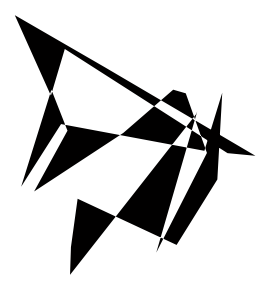

In [47]:
li[1].show(figsize=[3,3])

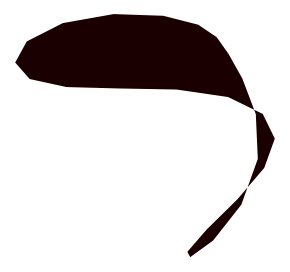

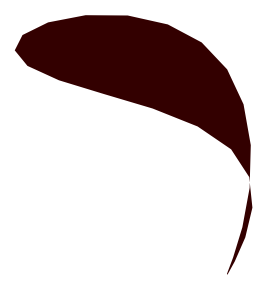

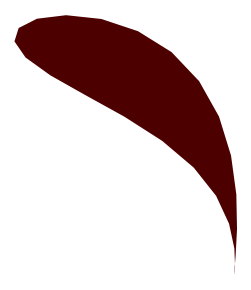

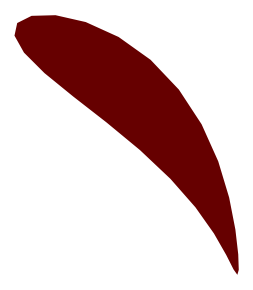

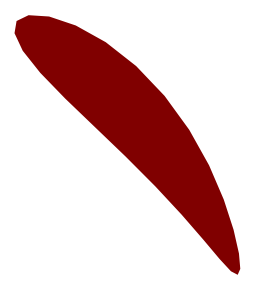

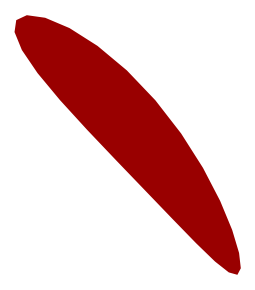

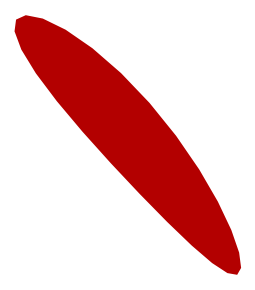

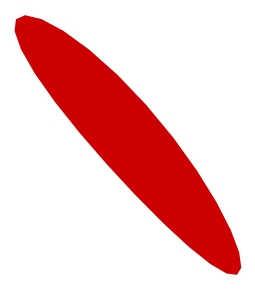

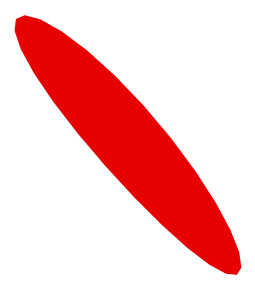

In [46]:
[li[20*i].show(figsize=[3,3]) for i in range(1,10)];

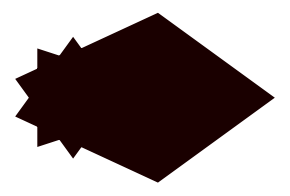

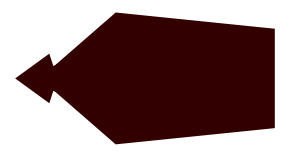

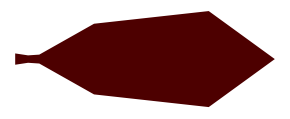

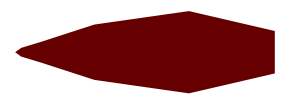

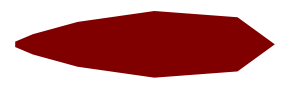

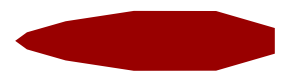

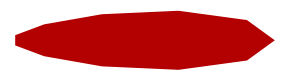

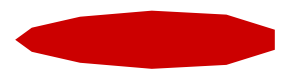

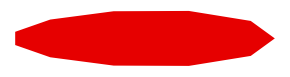

In [52]:
polyiter=[CC(exp(2*pi*I*(7*k)/10)) for k in [0..10]]
polyiter=ShiftCenter(polyiter,-sum([vector(x) for x in polyiter])*1/len(polyiter))
li=[polygon(polyiter,color="black")]
for i in [1..30]:
    polyiter=AvPolyScale(polyiter,2^(1/10))
    li.append(polygon(polyiter,color=Color(i/30,0,0),axes=False))
[li[3*i].show(figsize=[3,3]) for i in range(1,10)];